# Датасет регрессии

## Описание датасета

battery_id: Unique identifier for each battery.

manufacturer: Battery manufacturer (Tesla, Panasonic, LG Chem, CATL, BYD, Samsung SDI).

chemistry: Battery chemistry (NMC, LFP, NCA).

capacity_kWh: Nominal battery capacity in kilowatt-hours (40–120 kWh).

charge_cycles: Number of full charge–discharge cycles (50–3000).

avg_temp_celsius: Average operating temperature in °C (–10 to 50).

discharge_rate_c: Typical discharge rate in C (0.5–5).

charge_rate_c: Typical charge rate in C (0.5–3).

avg_soc_percent: Average state of charge during use (10–90%).

storage_time_months: Months battery spent in storage before use (0–24).

fast_charge_ratio: Fraction of charging events that were fast charging (0–1).

calendar_age_years: Age since manufacturing (0.1–12 years).

capacity_retained_percent (target variable): Actual remaining capacity (%) relative to nominal capacity.

“C-rate” is a unit that measures the rate of charging or discharging relative to the battery’s capacity.

1C means the current will charge or discharge the battery in 1 hour.

Example: A 1000 mAh (1 Ah) battery at 1C = 1 A current → full discharge in 1 h.

0.5C = half of the capacity per hour.

## Обоснование выбора

На текущий момент электрокары стремительно входят в использование, особенно в крупных городах, т.к. считаются более экологичной альтернативой - к примеру, в Китае стремительно происходит переход на них. Т.к. батарея электокара составляет основную часть его стоимости, то определение долгосрочности работы батареи является ценной задачей.

## Анализ и обработка датасета

In [621]:
import os

import kagglehub

import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

### Загрузим датасет через kagglehub

In [622]:
dataset_path = kagglehub.dataset_download('sahilbarke/ev-battery-dataset')

In [623]:
filename = os.listdir(dataset_path)[0]

In [624]:
df = pd.read_csv(os.path.join(dataset_path,filename))

### Рассмотрим датасет

In [625]:
len(df)

15000

In [626]:
df.head()

,battery_id,manufacturer,chemistry,capacity_kWh,charge_cycles,avg_temp_celsius,discharge_rate_c,charge_rate_c,avg_soc_percent,storage_time_months,fast_charge_ratio,calendar_age_years,capacity_retained_percent
0,BAT000001,Panasonic,NMC,65.54,1524.0,26.61,1.507,0.500,51.96,0.1,0.155,1.58,81.75
1,BAT000002,Samsung SDI,LFP,NaN,1072.0,16.82,0.850,0.927,80.76,11.0,0.466,3.44,81.93
2,BAT000003,BYD,LFP,99.99,807.0,6.27,0.751,1.232,74.73,3.5,0.058,0.23,89.75
3,BAT000004,CATL,NMC,85.96,681.0,28.65,0.788,1.070,30.95,0.2,0.332,3.43,84.41
4,BAT000005,Tesla,NMC,69.85,476.0,41.57,0.683,0.607,59.67,3.6,0.307,0.34,87.04


In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   battery_id                 15000 non-null  object 
 1   manufacturer               14315 non-null  object 
 2   chemistry                  14256 non-null  object 
 3   capacity_kWh               14268 non-null  float64
 4   charge_cycles              14311 non-null  float64
 5   avg_temp_celsius           14282 non-null  float64
 6   discharge_rate_c           14280 non-null  float64
 7   charge_rate_c              14289 non-null  float64
 8   avg_soc_percent            14241 non-null  float64
 9   storage_time_months        14259 non-null  float64
 10  fast_charge_ratio          14254 non-null  float64
 11  calendar_age_years         14203 non-null  float64
 12  capacity_retained_percent  14249 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.5+ M

In [628]:
df.isnull().sum()

battery_id                     0
manufacturer                 685
chemistry                    744
capacity_kWh                 732
charge_cycles                689
avg_temp_celsius             718
discharge_rate_c             720
charge_rate_c                711
avg_soc_percent              759
storage_time_months          741
fast_charge_ratio            746
calendar_age_years           797
capacity_retained_percent    751
dtype: int64

In [629]:
df.describe(include='all')

,battery_id,manufacturer,chemistry,capacity_kWh,charge_cycles,avg_temp_celsius,discharge_rate_c,charge_rate_c,avg_soc_percent,storage_time_months,fast_charge_ratio,calendar_age_years,capacity_retained_percent
count,15000,14315,14256,14268.000000,14311.000000,14282.000000,14280.000000,14289.000000,14241.000000,14259.000000,14254.000000,14203.000000,14249.000000
unique,15000,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BAT015000,Tesla,NMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2901,7784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,74.831688,724.540354,24.836594,1.060485,1.017919,55.178979,3.962192,0.273791,1.997541,87.059668
std,NaN,NaN,NaN,14.809087,398.426835,8.644186,0.498338,0.360305,14.923134,3.957581,0.175465,1.977227,6.587419
min,NaN,NaN,NaN,40.000000,50.000000,-9.940000,0.500000,0.500000,10.000000,0.000000,0.000000,0.100000,25.010000
25%,NaN,NaN,NaN,64.507500,467.500000,19.940000,0.584000,0.731000,45.040000,1.100000,0.132000,0.570000,84.000000
50%,NaN,NaN,NaN,74.900000,655.000000,25.030000,0.989000,0.997000,55.410000,2.700000,0.245000,1.380000,87.840000
75%,NaN,NaN,NaN,85.030000,880.000000,30.070000,1.393000,1.267000,65.430000,5.500000,0.390000,2.770000,91.050000


In [630]:
TARGET_NAME = "capacity_retained_percent"

### Сохраним необработанный датасет

Все пропущенные значения вырезаем, категориальные переменные отбрасываем

In [631]:
df_raw = df.dropna()

In [632]:
df_raw[df_raw.select_dtypes(include=["int64", "float64"]).columns.to_list()].drop(columns=TARGET_NAME).to_csv("regression_raw_feats.csv")

In [633]:
df_raw[[TARGET_NAME]].to_csv('regression_raw_target.csv')

### Разберёмся с пропусками

#### Проверим, есть ли корреляция между пропусками

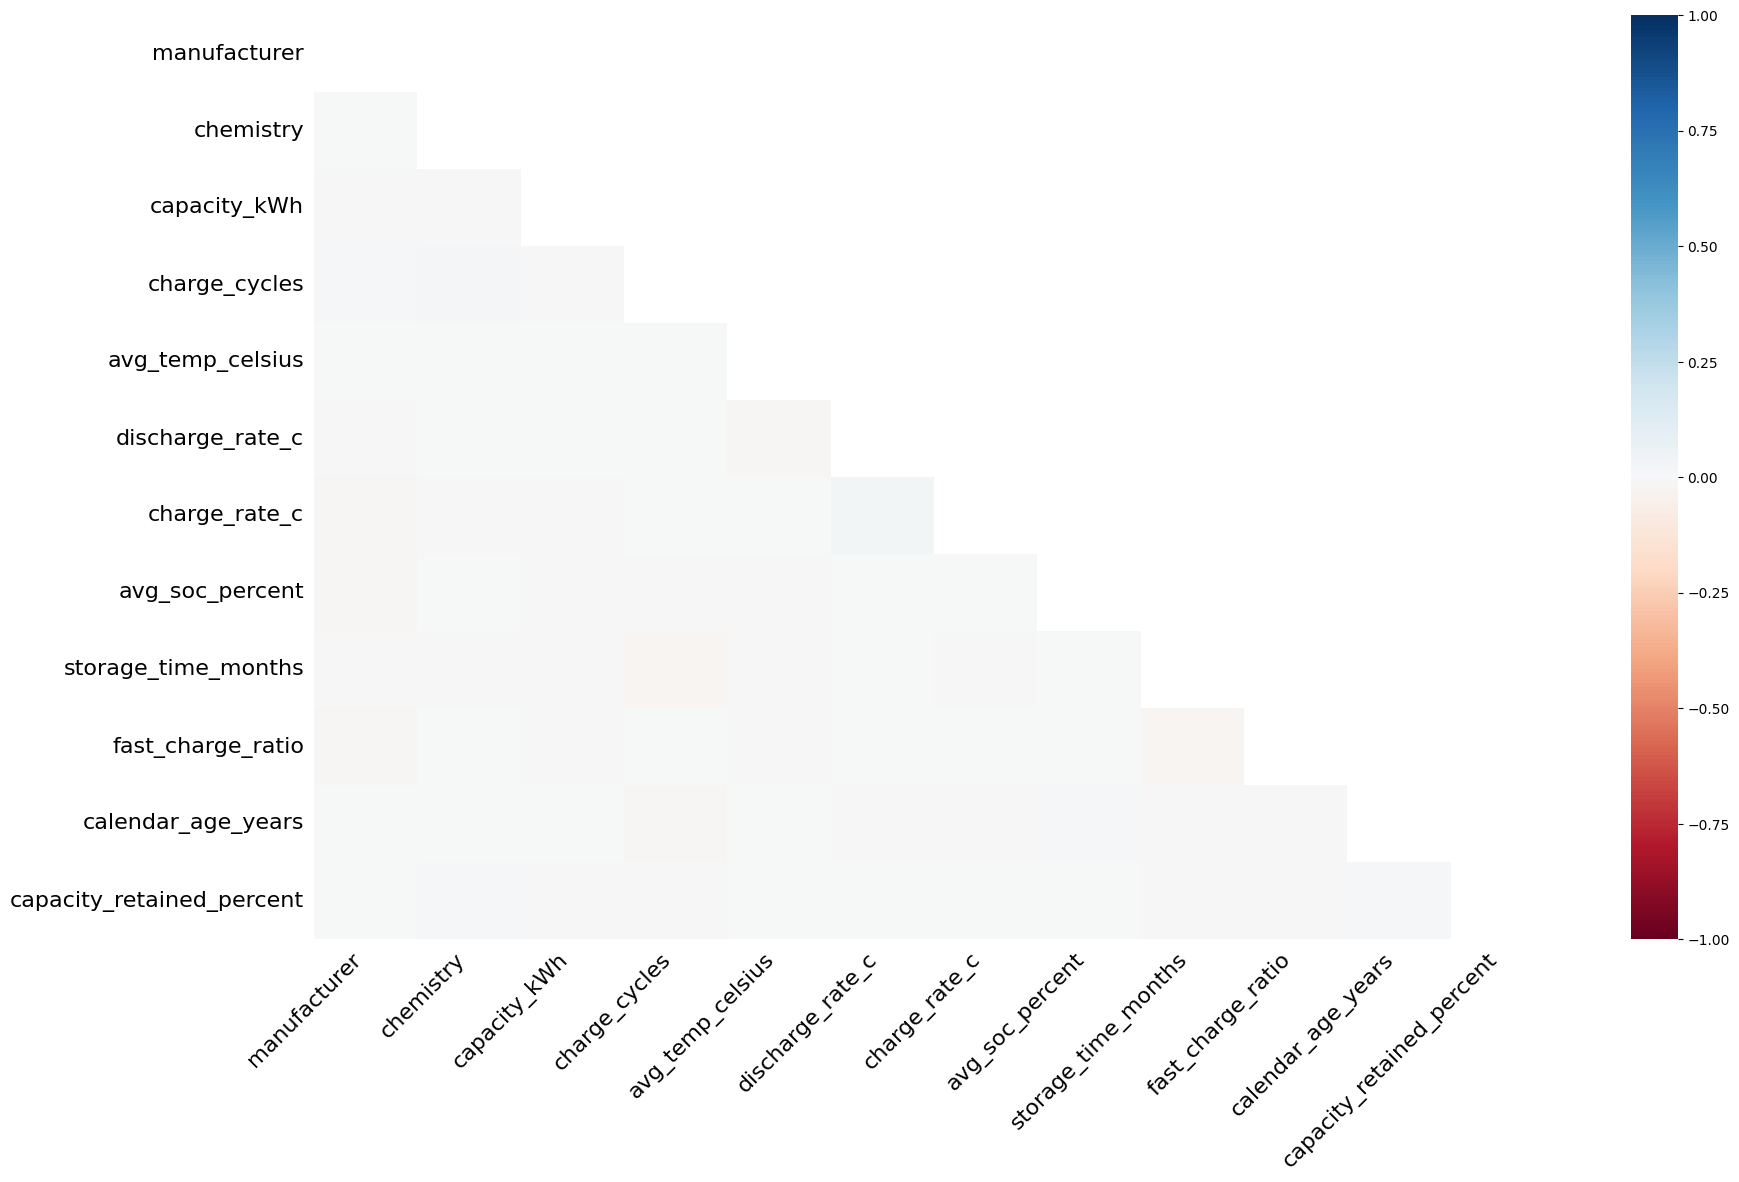

In [634]:
msno.heatmap(df)
plt.show()

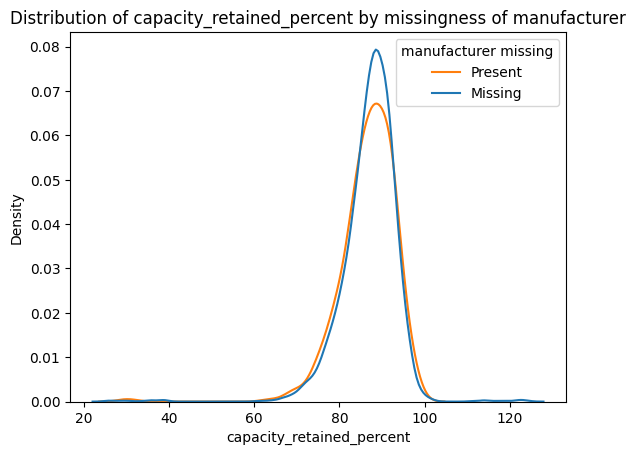

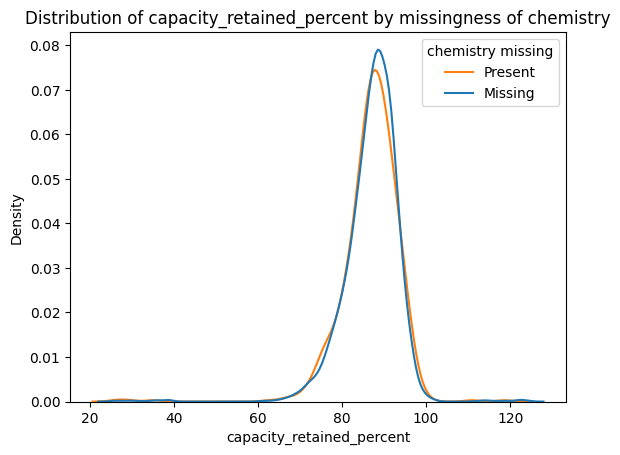

In [635]:
categorical_features = df.select_dtypes(include=["object"]).columns.to_list()
categorical_features.remove("battery_id")

for categorical_feature in categorical_features:
    df['missing'] = df[categorical_feature].isnull()

    sns.kdeplot(data=df, x=TARGET_NAME, hue='missing', common_norm=False)
    plt.title(f'Distribution of {TARGET_NAME} by missingness of {categorical_feature}')
    plt.legend(title=categorical_feature+' missing', labels=['Present', 'Missing'])
    plt.show()

In [636]:
df.drop(columns=['missing'], inplace=True)

Вывод: корреляции нет

#### Численные пропуски заполним медианным значением

In [637]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

#### Сделаем mode impute для категориальных данных

In [638]:
category_columns = df.select_dtypes(include=['object']).columns
cate_imputer = SimpleImputer(strategy='most_frequent')
df[category_columns] = cate_imputer.fit_transform(df[category_columns])

In [639]:
df.isnull().sum()

battery_id                   0
manufacturer                 0
chemistry                    0
capacity_kWh                 0
charge_cycles                0
avg_temp_celsius             0
discharge_rate_c             0
charge_rate_c                0
avg_soc_percent              0
storage_time_months          0
fast_charge_ratio            0
calendar_age_years           0
capacity_retained_percent    0
dtype: int64

In [640]:
len(df)

15000

### Почистим и преобразуем данные

In [641]:
df.describe()

,capacity_kWh,charge_cycles,avg_temp_celsius,discharge_rate_c,charge_rate_c,avg_soc_percent,storage_time_months,fast_charge_ratio,calendar_age_years,capacity_retained_percent
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,74.831688,724.540354,24.836594,1.060485,1.017919,55.178979,3.962192,0.273791,1.997541,87.059668
std,14.443201,389.168111,8.434751,0.486230,0.351662,14.540652,3.858584,0.171045,1.923978,6.420385
min,40.000000,50.000000,-9.940000,0.500000,0.500000,10.000000,0.000000,0.000000,0.100000,25.010000
25%,65.150000,477.000000,20.260000,0.608000,0.746000,45.730000,1.200000,0.137000,0.600000,84.250000
50%,74.831688,673.000000,24.836594,1.027000,1.017919,55.178979,2.900000,0.258000,1.500000,87.500000
75%,84.392500,865.000000,29.780000,1.368000,1.252000,64.830000,5.300000,0.380000,2.670000,90.860000
max,120.000000,2898.000000,50.000000,3.303000,2.534000,90.000000,24.000000,0.938000,12.000000,124.990000


#### Наиболее явный выброс - остаток ёмкости батареи больше 100%

In [642]:
len(df[df[TARGET_NAME] > 100.0])

69

In [643]:
df = df[df[TARGET_NAME] <= 100.0]

#### Уберём id

In [644]:
df.drop(columns=['battery_id'], inplace=True)

#### Сделаем one-hot encoding

In [645]:
df_onehot = pd.get_dummies(df, drop_first=True)

### Рассмотрим распределения величин

#### Численные величины

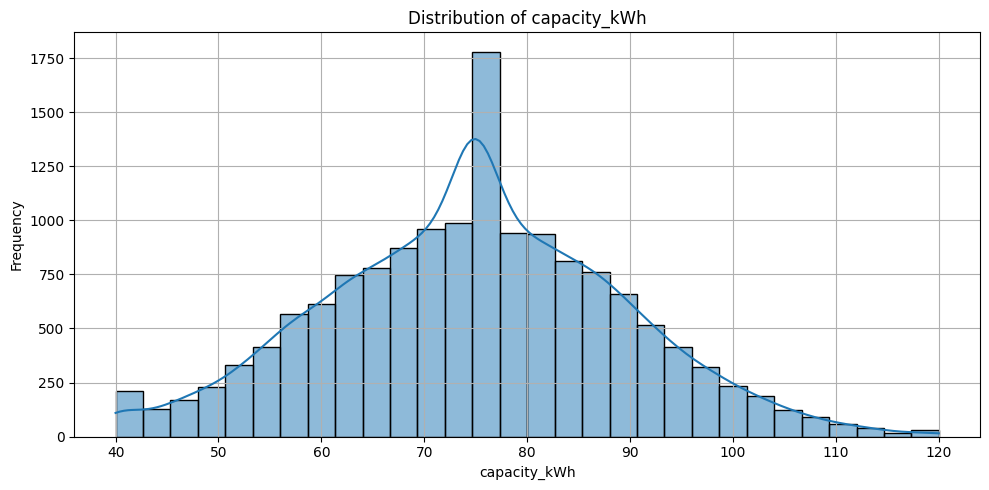

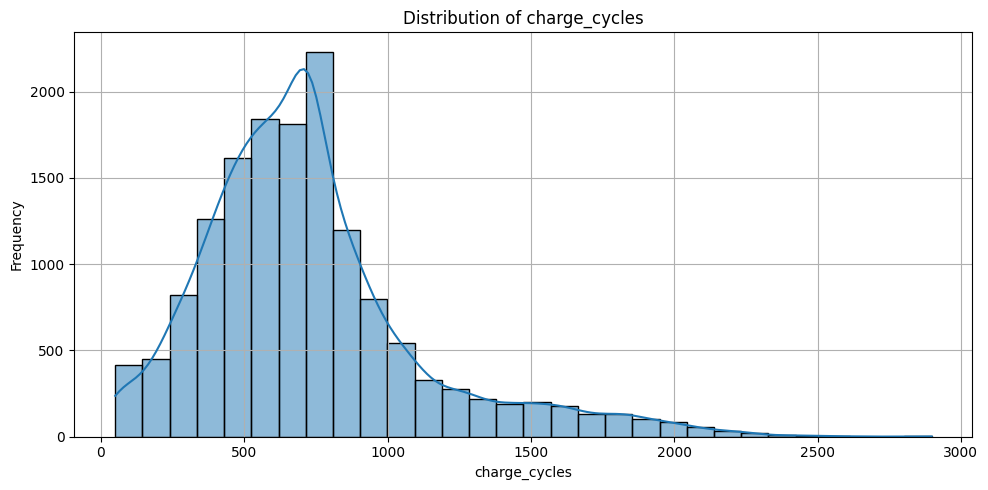

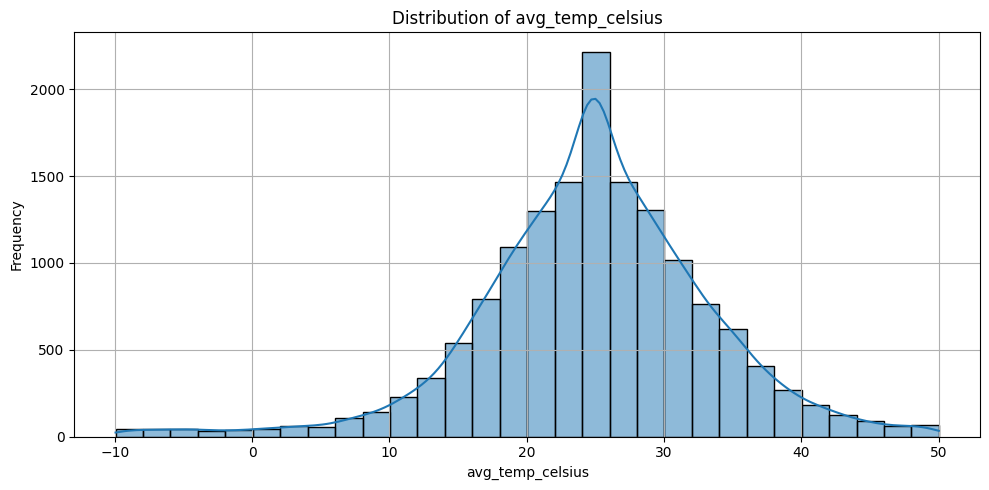

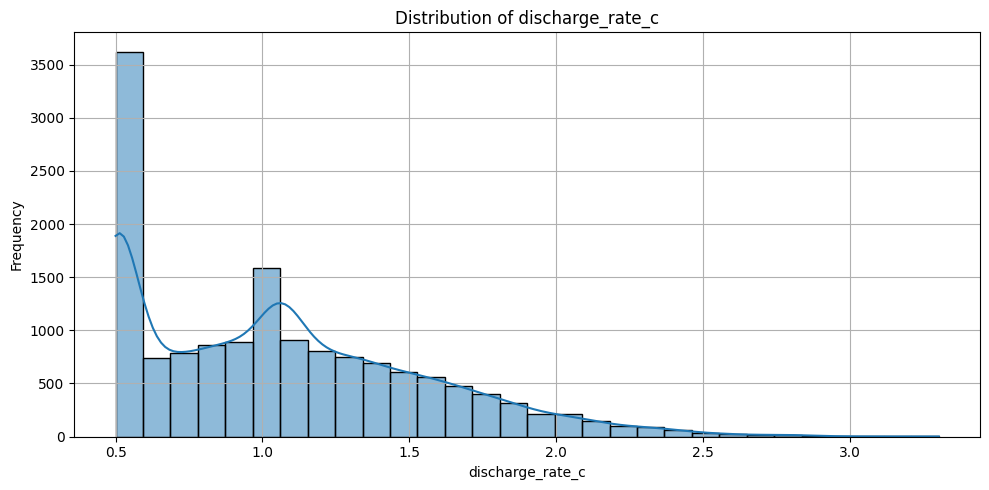

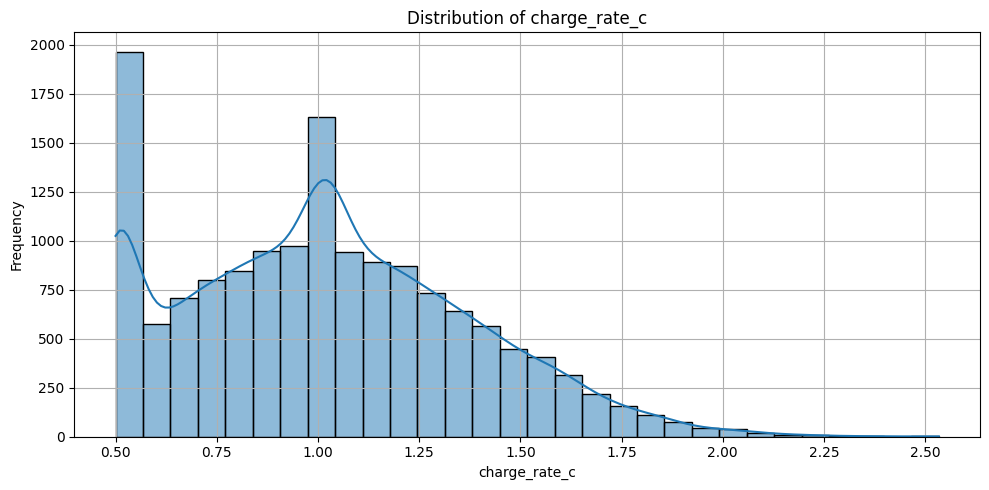

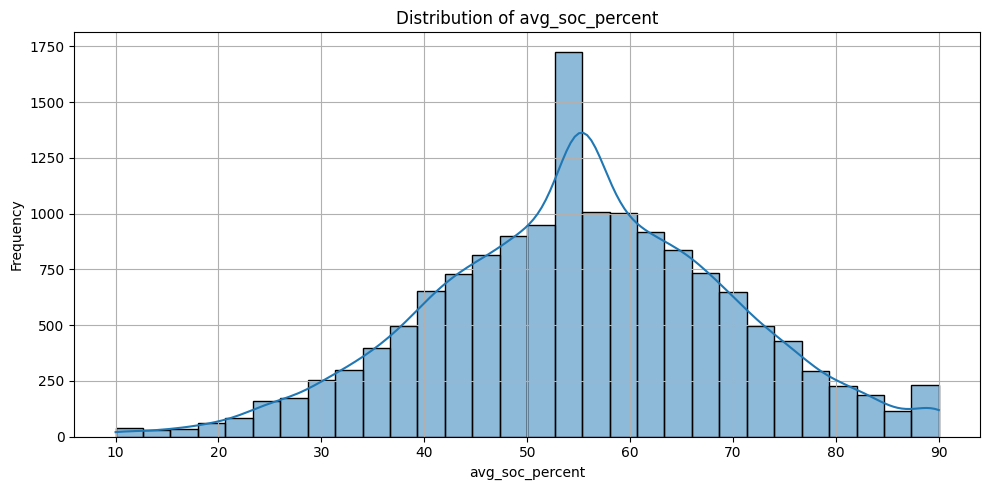

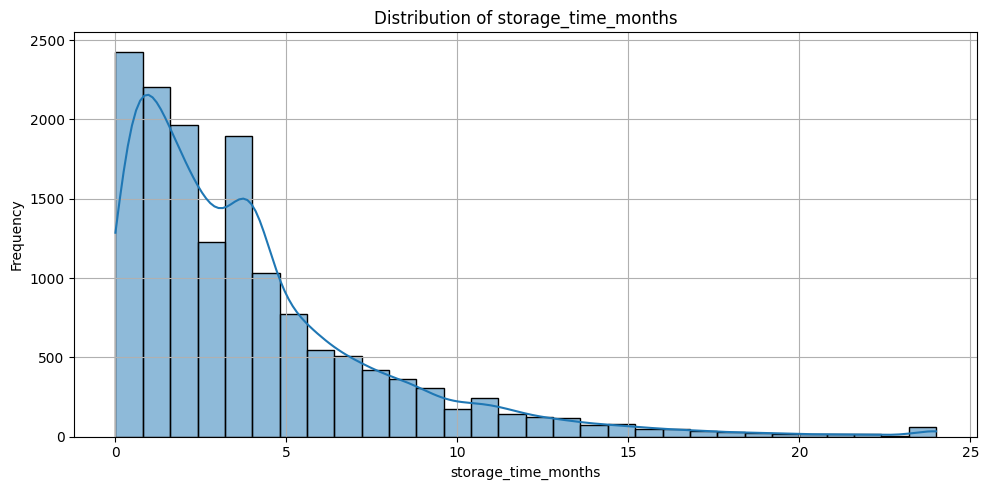

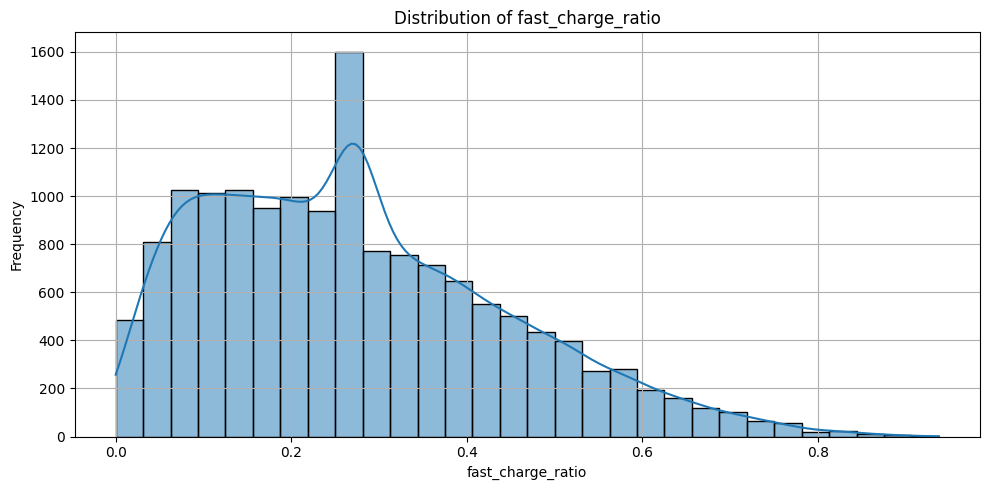

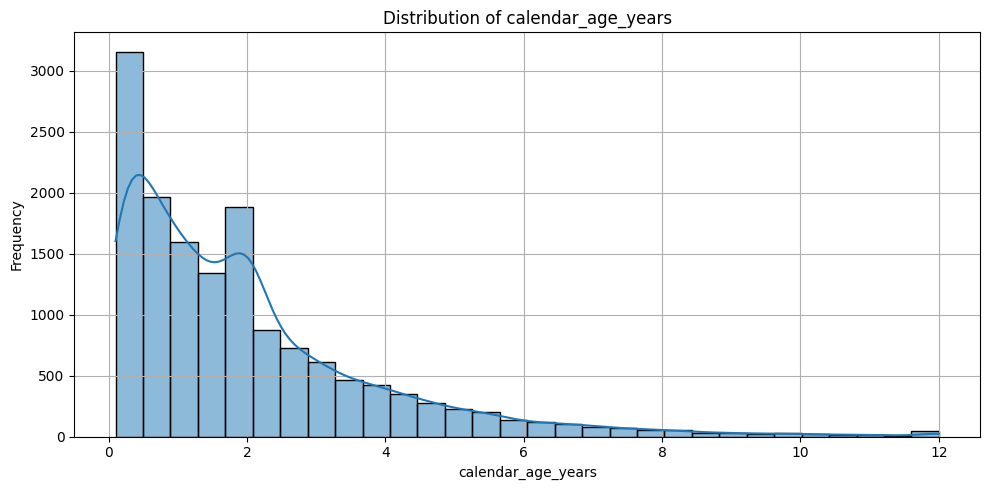

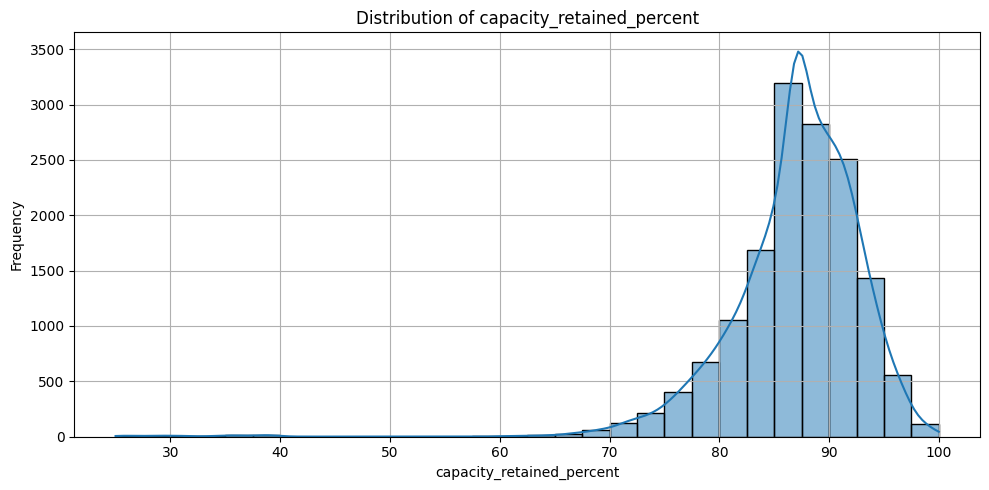

In [646]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.to_list()

for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Категориальные величины

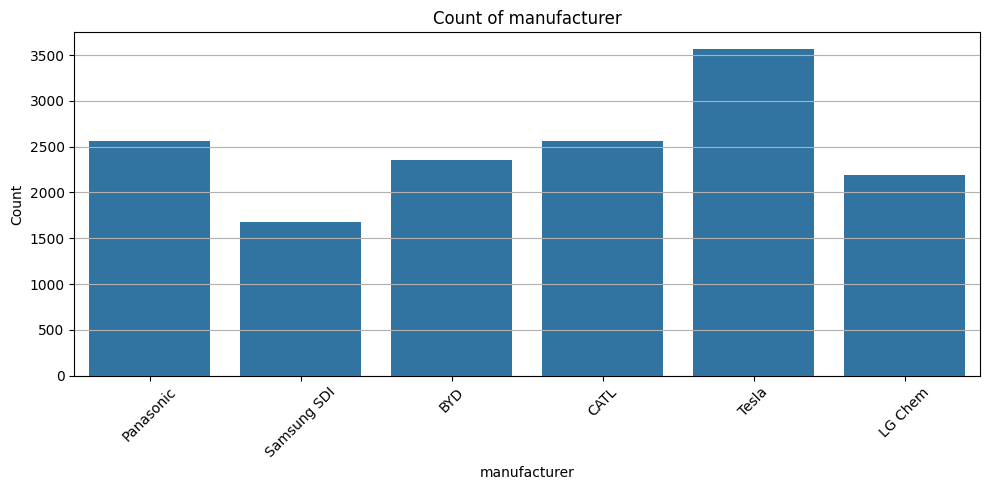

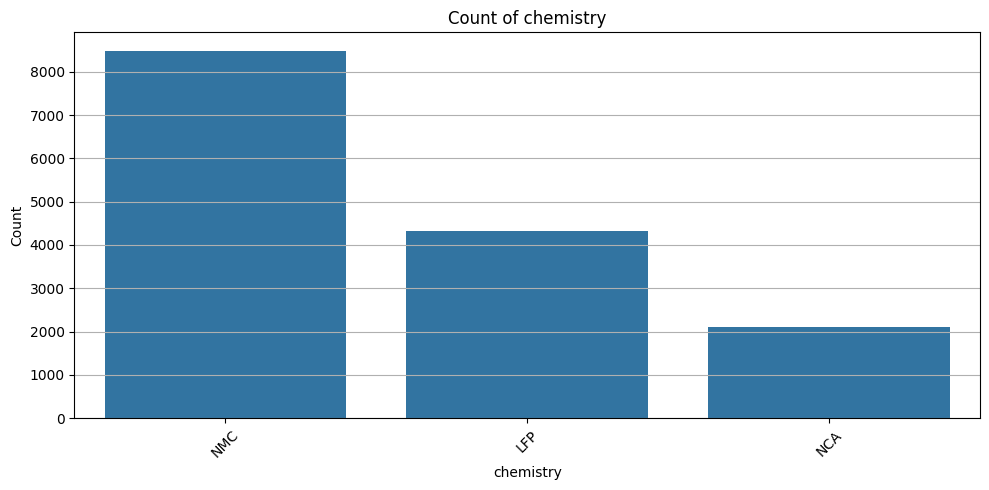

In [647]:
categorical_features = df.select_dtypes(include=["object"]).columns.to_list()

for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

#### Матрица корреляции

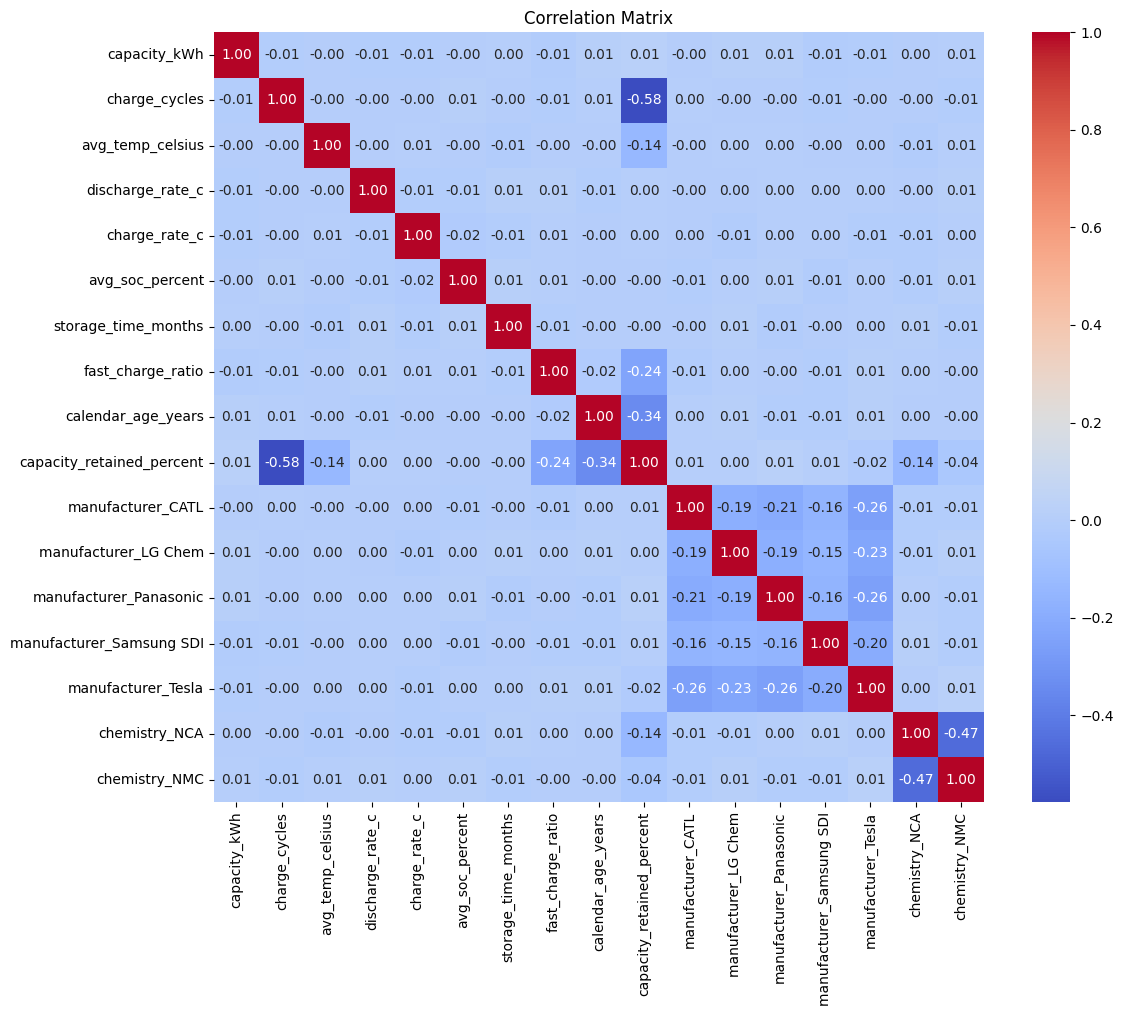

In [648]:
plt.figure(figsize=(12, 10))
corr_matrix = df_onehot.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

#### Боксплот

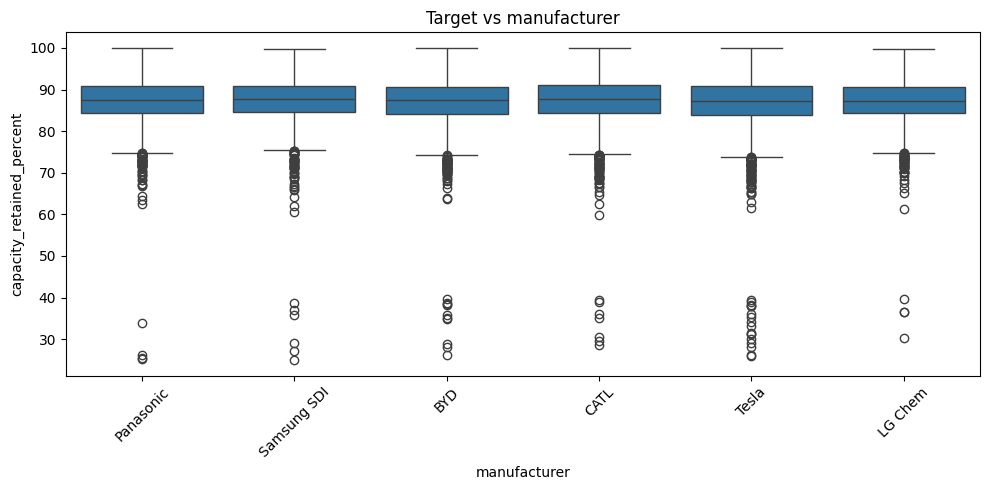

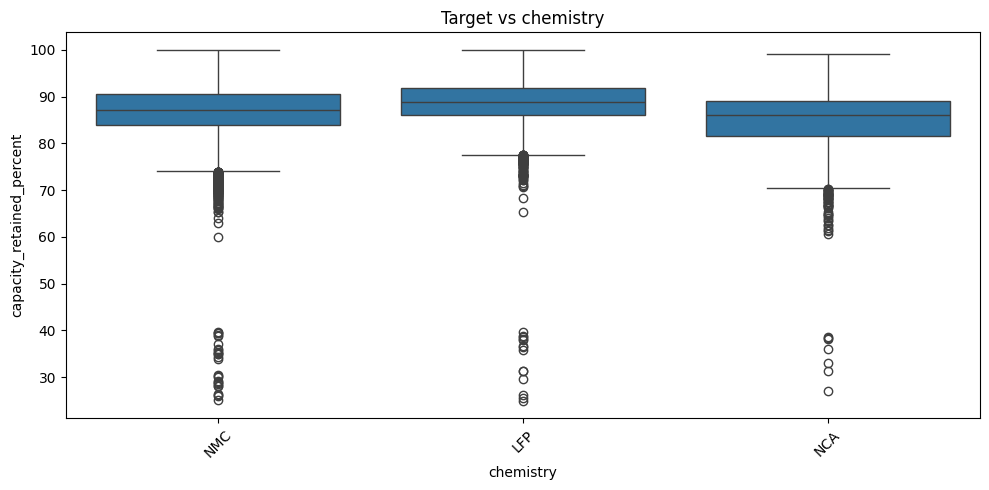

In [649]:
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col], y=df[TARGET_NAME])
    plt.title(f"Target vs {col}")
    plt.xlabel(col)
    plt.ylabel(TARGET_NAME)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Проверим коллинеарность фичей

In [650]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

In [651]:
X_for_vif = df_onehot.drop(columns=[TARGET_NAME])

X_vif_ready = X_for_vif.select_dtypes(include=['int64', 'float64']).astype(float)

X_vif_ready = add_constant(X_vif_ready)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif_ready.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_ready.values, i) for i in range(X_vif_ready.shape[1])]
vif_data = vif_data[vif_data["Feature"] != "const"]

print("\n VIF Scores (Multicollinearity Check):")
print(vif_data.sort_values(by="VIF", ascending=False))


 VIF Scores (Multicollinearity Check):
               Feature       VIF
8    fast_charge_ratio  1.001017
6      avg_soc_percent  1.000743
5        charge_rate_c  1.000732
9   calendar_age_years  1.000670
7  storage_time_months  1.000518
1         capacity_kWh  1.000443
4     discharge_rate_c  1.000345
2        charge_cycles  1.000305
3     avg_temp_celsius  1.000250


Выводы: значительной коллинеарности между фичами нет.

### Выберем лучшие фичи

Из фичей оставляем charge_cycles, avg_temp_celsius, fast_charge_ratio, calendar_age_years, chemistry_NCA. Новых фичей на основе имеющихся особо не сделать.

In [652]:
df_onehot = df_onehot[['charge_cycles', 'avg_temp_celsius', 'fast_charge_ratio', 'calendar_age_years', 'chemistry_NCA', TARGET_NAME]]

### Произведём скалирование величин

In [653]:
scaler = StandardScaler()
scaler.fit(df_onehot.drop(TARGET_NAME, axis=1))

StandardScaler()

In [654]:
scaled_features = scaler.transform(df_onehot.drop(TARGET_NAME,axis=1))

In [655]:
df_feat = pd.DataFrame(scaled_features, columns=df_onehot.columns[:-1])

In [656]:
df_feat.describe()

,charge_cycles,avg_temp_celsius,fast_charge_ratio,calendar_age_years,chemistry_NCA
count,1.493100e+04,1.493100e+04,1.493100e+04,1.493100e+04,1.493100e+04
mean,2.046302e-16,1.694148e-16,-8.994212e-17,2.379421e-17,-4.949196e-17
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-1.737058e+00,-4.124308e+00,-1.603186e+00,-9.874043e-01,-4.061246e-01
25%,-6.343597e-01,-5.422843e-01,-7.957765e-01,-7.225003e-01,-4.061246e-01
50%,-1.331333e-01,-8.196305e-04,-8.783062e-02,-2.602169e-01,-4.061246e-01
75%,3.603819e-01,5.865097e-01,6.259661e-01,3.526982e-01,-4.061246e-01
max,5.583418e+00,2.982826e+00,3.884858e+00,5.193689e+00,2.462299e+00


### Сохранение датасета

In [657]:
df_feat.to_csv('regression_processed_feats.csv')

In [658]:
df_onehot[TARGET_NAME].to_csv('regression_processed_target.csv')

# Выбор и обоснование метрик регрессии

# Датасет классификации

## Анализ датасета

# Выбор и обоснование метрик классификации